In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('slimTurkeySurveyDataWithCategories.csv')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,4,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
target = df["Class"]
target_names = ["Married", "Divorced"]

In [4]:
data = df.drop("Class", axis=1)
feature_names = data.columns
df = df.reset_index()
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,4,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8936170212765957

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion = 'gini', random_state = 0)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9148936170212766

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# what is aAtr40 that is has 13% importance in terms of predicting?

[(0.1300475021600784, 'Atr40'),
 (0.0828653199353468, 'Atr38'),
 (0.07788687813205994, 'Atr36'),
 (0.07302511016590253, 'Atr41'),
 (0.07168136837213293, 'Atr37'),
 (0.043870608469662634, 'Atr17'),
 (0.04079085308815635, 'Atr44'),
 (0.039725020124109556, 'Atr35'),
 (0.03912506800799314, 'Atr39'),
 (0.032779859395534745, 'Atr18'),
 (0.03229130704520283, 'Atr33'),
 (0.031176554304664067, 'Atr34'),
 (0.02289105672486974, 'Atr19'),
 (0.021855059151540512, 'Atr54'),
 (0.019551253020280695, 'Atr11'),
 (0.01753866839269152, 'Atr4'),
 (0.01639163855698906, 'Atr16'),
 (0.01600031534918213, 'Atr9'),
 (0.012941613896352826, 'Atr20'),
 (0.012841680565620768, 'Atr32'),
 (0.011695855135303053, 'Atr15'),
 (0.011495450918030987, 'Atr14'),
 (0.011362236772189518, 'Atr31'),
 (0.00964486762749962, 'Atr25'),
 (0.008717420285470739, 'Atr42'),
 (0.008365155379269148, 'Atr53'),
 (0.00781575945997878, 'Atr21'),
 (0.007542966062532034, 'Atr3'),
 (0.006966347041505484, 'Atr50'),
 (0.005950697038780413, 'Atr30'),

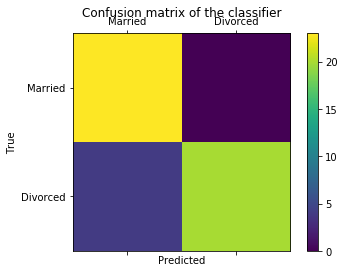

In [23]:
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# google images of confusion matrix
# https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816

In [21]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

#Importance of precision and recall (google the formula)
# What if Married data set is 1000, and Divorced data set is #100, recall will be low.

              precision    recall  f1-score   support

     Married       0.82      1.00      0.90        23
    Divorced       1.00      0.79      0.88        24

    accuracy                           0.89        47
   macro avg       0.91      0.90      0.89        47
weighted avg       0.91      0.89      0.89        47



In [24]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  23
False Positives:  0
False Negatives:  4
True Positives:  20
